
# The relation between Efficiency and Tempreture Degrees
## OM Analytics
***

## Table of Contents
### Purpose 
### Discovering and Manulpating the Data
### Calculating Efficiency
### Descriptive Statistics
### Visualizing the Data
### Conclusion


### Purpose

Calculating Efficiency of the Internal Temperature Degrees for Medical Laboratories in The Regional Laboratory and Central Blood Bank. Finding a Relation between Temperature Degrees as 'Independent Variable', Efficiency Rates and Quality as 'Dependent Variable'.

As an Electrical Engineer had worked for a private company in the Project of Health Facilities Maintenance and Operation. 
He faced a high-temperature problem inside Medical Laboratories and especially in Summer with outside temperatures reach 50 C.
He teamed up with 5 people to solve this problem and was of Business requirements calculating Efficiency for each Temperature Degree. Based on his knowledge in Math, he created a new formula for calculating the Efficiency for Temperature Degrees.

### Discovering and Manipulating the Data

#### Importing Libraries

In [4]:
__author__ = "Abdulaziz Alsulami"
__date__ = '2020-aug'
__email__ = "engaziz02@gmail.com"

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the Data

In [6]:
lab_df = pd.read_csv('D:\own_project.csv', sep=';')

print('Data')
lab_df

Data


,No of Devices,Floor Name,Temperature Degree,Room,Lab Name
0,6,GF,28.30,1,Blood Bank
1,5,GF,27.55,2,Blood Bank
2,4,GF,28.42,3,Blood Bank
3,5,GF,26.81,4,Blood Bank
4,3,GF,25.60,5,Blood Bank
5,6,GF,28.07,1,Nucleic Acid Testing
6,4,FF,28.24,1,Polymerase Chain Reaction
7,7,FF,29.15,2,Polymerase Chain Reaction
8,5,FF,28.29,3,Polymerase Chain Reaction
9,5,FF,27.65,4,Polymerase Chain Reaction


#### Checking count of Rows and Columns

In [7]:
print('Rows Count:   ',lab_df.shape[0])
print('Columns Count: ',lab_df.shape[1])

Rows Count:    19
Columns Count:  5


#### Checking types of data for each column

In [8]:
print('Column_Name       ','Data_Type')
lab_df.dtypes

Column_Name        Data_Type


No of Devices           int64
Floor Name             object
Temperature Degree    float64
Room                    int64
Lab Name               object
dtype: object

#### Rearranging The  Columns

In [9]:
lab_df = lab_df.reindex(columns = ['Lab Name','Room','Floor Name','No of Devices','Temperature Degree'])

print('Data after Rearrange the Columns:')
lab_df

Data after Rearrange the Columns:


,Lab Name,Room,Floor Name,No of Devices,Temperature Degree
0,Blood Bank,1,GF,6,28.30
1,Blood Bank,2,GF,5,27.55
2,Blood Bank,3,GF,4,28.42
3,Blood Bank,4,GF,5,26.81
4,Blood Bank,5,GF,3,25.60
5,Nucleic Acid Testing,1,GF,6,28.07
6,Polymerase Chain Reaction,1,FF,4,28.24
7,Polymerase Chain Reaction,2,FF,7,29.15
8,Polymerase Chain Reaction,3,FF,5,28.29
9,Polymerase Chain Reaction,4,FF,5,27.65


#### Renaming the Columns 

In [10]:
lab_df = lab_df.rename(columns={
                                'Lab Name':'LabName',
                                'Room':'Room',
                                'Floor Name':'Floor',
                                'Temperature Degree':'TemperatureDegree',
                                'No of Devices':'DevicesCount'
                                })

print('Data After Rename The Columns:')
lab_df

Data After Rename The Columns:


,LabName,Room,Floor,DevicesCount,TemperatureDegree
0,Blood Bank,1,GF,6,28.30
1,Blood Bank,2,GF,5,27.55
2,Blood Bank,3,GF,4,28.42
3,Blood Bank,4,GF,5,26.81
4,Blood Bank,5,GF,3,25.60
5,Nucleic Acid Testing,1,GF,6,28.07
6,Polymerase Chain Reaction,1,FF,4,28.24
7,Polymerase Chain Reaction,2,FF,7,29.15
8,Polymerase Chain Reaction,3,FF,5,28.29
9,Polymerase Chain Reaction,4,FF,5,27.65


###  Calculating the Efficiency for each Temperature Degree

Set Ideal, Actual and Breakdown Temperature Degrees as well as create a Formula for calculating Actual Efficiency

In [11]:
# All Temperature Degree in Celsius.

# Ideal Tempreture Degree 
ideal_temp_deg = 22

# Actual Tempreture Degrees
actual_temp_deg = lab_df['TemperatureDegree']

# Ideal Efficincy percent
ideal_eff = 100

# one Temperature Degree Equal 10 percent from Efficiency 
one_deg = 10

# Actual Efficiency percent
actual_eff = ideal_eff -(actual_temp_deg -ideal_temp_deg)* one_deg

# Breakdown Tempreture Degree
Break_temp_deg = ideal_temp_deg + 10

In [12]:
def calculating_actual_efficiency(x):
    '''returns to efficiency rate of x'''
    ideal_eff = 100
    ideal_temp_deg = 22
    one_deg = 10
    actual_temp_deg = x
    actual_eff = ideal_eff - (actual_temp_deg -ideal_temp_deg)* one_deg
    return round(actual_eff,2)

#### Creating a new column called Efficiency

In [13]:
lab_df['Efficiency'] = calculating_actual_efficiency(lab_df['TemperatureDegree'])
print('Data with Efficiency column: ')
lab_df

Data with Efficiency column: 


,LabName,Room,Floor,DevicesCount,TemperatureDegree,Efficiency
0,Blood Bank,1,GF,6,28.30,37.0
1,Blood Bank,2,GF,5,27.55,44.5
2,Blood Bank,3,GF,4,28.42,35.8
3,Blood Bank,4,GF,5,26.81,51.9
4,Blood Bank,5,GF,3,25.60,64.0
5,Nucleic Acid Testing,1,GF,6,28.07,39.3
6,Polymerase Chain Reaction,1,FF,4,28.24,37.6
7,Polymerase Chain Reaction,2,FF,7,29.15,28.5
8,Polymerase Chain Reaction,3,FF,5,28.29,37.1
9,Polymerase Chain Reaction,4,FF,5,27.65,43.5


#### Displaying the data according to  Laboratory Name column

In [14]:
lab_name_index = lab_df.groupby(by=['LabName']).mean()
print('Indexing the data by Lab Name column: ')
round(lab_name_index,2)


Indexing the data by Lab Name column: 


,Room,DevicesCount,TemperatureDegree,Efficiency
LabName,,,,
Blood Bank,3.0,4.6,27.34,46.64
Chemistry,1.0,5.0,26.34,56.60
Hematology,1.0,3.0,24.78,72.20
Microbiology,1.0,5.0,26.06,59.40
Nucleic Acid Testing,1.0,6.0,28.07,39.30
Parasites,1.0,2.0,22.18,98.20
Polymerase Chain Reaction,3.5,4.5,27.44,45.65
Serology,1.0,8.0,27.04,49.60
Water chemistry,1.0,6.0,23.12,88.80


#### How many laboratories had Efficiency greater than or equal 70 ? Which Laboratory had higher Efficiency ?

In [15]:
criteria_1 = lab_df['Efficiency'] >= 70
crit_1 = lab_df[criteria_1][['LabName','Efficiency','Room']].sort_values('Efficiency',ascending=False).reset_index(drop=True)

answer = '''{0} laboratories.
{1} laboratory has the highest Efficiency. '''

print(answer.format(len(crit_1),crit_1.LabName.iloc[0]))
crit_1

4 laboratories.
Parasites laboratory has the highest Efficiency. 


,LabName,Efficiency,Room
0,Parasites,98.2,1
1,Water chemistry,88.8,1
2,Polymerase Chain Reaction,76.5,5
3,Hematology,72.2,1


#### How many laboratories had Efficiency less than 70 ?  Which Laboratory had lower Efficiency ?

In [16]:
criteria_2 = lab_df['Efficiency'] < 70
crit_2 = lab_df[criteria_2][['LabName','Efficiency','Room']].sort_values('Efficiency').reset_index(drop=True)

answer = '''{0} laboratories.
Room {1} at {2} laboratory has the lowest Efficiency. '''

print(answer.format(len(crit_2), crit_2.Room[0],crit_2.LabName[0]))
crit_2

15 laboratories.
Room 2 at Polymerase Chain Reaction laboratory has the lowest Efficiency. 


,LabName,Efficiency,Room
0,Polymerase Chain Reaction,28.5,2
1,Blood Bank,35.8,3
2,Blood Bank,37.0,1
3,Polymerase Chain Reaction,37.1,3
4,Polymerase Chain Reaction,37.6,1
5,Nucleic Acid Testing,39.3,1
6,Polymerase Chain Reaction,43.5,4
7,Blood Bank,44.5,2
8,Serology,49.6,1
9,Polymerase Chain Reaction,50.7,6


#### How many laboratories had Temperature Degrees less than or equal 25 ?

In [17]:
criteria_2 = lab_df['TemperatureDegree'] <= 25
crit_2 = lab_df[criteria_2][['LabName','TemperatureDegree']].sort_values(by='TemperatureDegree')

answer = '''{0} laboratories: '''

print(answer.format(len(crit_2)))
crit_2

4 laboratories: 


,LabName,TemperatureDegree
16,Parasites,22.18
14,Water chemistry,23.12
10,Polymerase Chain Reaction,24.35
17,Hematology,24.78


#### How many laboratories have Temperature Degrees greater than 25 ?

In [18]:
criteria_3 = lab_df['TemperatureDegree'] > 25
crit_3 = lab_df[criteria_3][['LabName','TemperatureDegree']].sort_values(by='TemperatureDegree')

answer = '''{0} laboratories:'''

print(answer.format(len(crit_3)))
crit_3

15 laboratories:


,LabName,TemperatureDegree
4,Blood Bank,25.60
13,immunology,26.06
15,Microbiology,26.06
18,Chemistry,26.34
3,Blood Bank,26.81
11,Polymerase Chain Reaction,26.93
12,Serology,27.04
1,Blood Bank,27.55
9,Polymerase Chain Reaction,27.65
5,Nucleic Acid Testing,28.07


#### Creating a new column is called Quality which gives value 'good'  if Efficiency greater than or equal 70 otherwise 'bad'.

In [19]:
lab_df['Quality'] = np.where(criteria_1, 'Good', 'Bad')
lab_df

,LabName,Room,Floor,DevicesCount,TemperatureDegree,Efficiency,Quality
0,Blood Bank,1,GF,6,28.30,37.0,Bad
1,Blood Bank,2,GF,5,27.55,44.5,Bad
2,Blood Bank,3,GF,4,28.42,35.8,Bad
3,Blood Bank,4,GF,5,26.81,51.9,Bad
4,Blood Bank,5,GF,3,25.60,64.0,Bad
5,Nucleic Acid Testing,1,GF,6,28.07,39.3,Bad
6,Polymerase Chain Reaction,1,FF,4,28.24,37.6,Bad
7,Polymerase Chain Reaction,2,FF,7,29.15,28.5,Bad
8,Polymerase Chain Reaction,3,FF,5,28.29,37.1,Bad
9,Polymerase Chain Reaction,4,FF,5,27.65,43.5,Bad


### Descriptive Statistics

#### Describing Statistics for Temperature Degree and Efficiency Columns

In [20]:
stat_temp_eff = lab_df.describe()[['TemperatureDegree','Efficiency']]
stat_temp_eff = pd.DataFrame(round(stat_temp_eff,2)).transpose()
stat_temp_eff['IQR'] = stat_temp_eff['75%'] - stat_temp_eff['25%']
stat_temp_eff

,count,mean,std,min,25%,50%,75%,max,IQR
TemperatureDegree,19.0,26.58,1.89,22.18,25.83,26.93,28.16,29.15,2.33
Efficiency,19.0,54.24,18.92,28.50,38.45,50.70,61.70,98.20,23.25


#### Describing Statistics for Categorcal Columns

In [21]:
lab_df.describe(include=['O']).transpose()

,count,unique,top,freq
LabName,19,10,Polymerase Chain Reaction,6
Floor,19,2,FF,13
Quality,19,2,Bad,15


#### The Average Value of Temperature Degrees and Efficiency

In [22]:
def mean(x):
    '''returns to the average value'''
    return sum(x) / len(x)

print('The Temperature Degrees average: ', round(mean(lab_df['TemperatureDegree']), 2), 'C')
print('The Efficiecny average:          ', round(mean(lab_df['Efficiency']), 2), '%')

The Temperature Degrees average:  26.58 C
The Efficiecny average:           54.24 %


#### The Middle Value of Temperature Degrees and Efficiency

In [23]:
def median(x):
    '''returns to the middel value '''
    x = sorted(x)
    n = len(x)
    medpoint = n // 2
    if n % 2 ==1:
        return x[medpoint]
    else:
        low= medpoint -1
        high= medpoint
        return (x[high] + x[low]) // 2
    
print('The Middle value of Tempreture Degrees: ', median(lab_df['TemperatureDegree']), 'C')
print('The Middle value of Efficiency :        ', median(lab_df['Efficiency']), ' %')

The Middle value of Tempreture Degrees:  26.93 C
The Middle value of Efficiency :         50.7  %


#### The Most Common Value of Temperature Degrees and Efficiency

In [24]:
from collections import Counter

def mode(x):
    '''returns to the most common values'''
    counts = Counter(x)
    max_counts = max(counts.values())
    return [key for key, val in counts.items() 
            if val == max_counts][0]
     
print('The Most Common Temperature Degree: ', mode(lab_df['TemperatureDegree']), 'C')
print('The Most Common Efficiency        : ', mode(lab_df['Efficiency']), ' %')

The Most Common Temperature Degree:  26.06 C
The Most Common Efficiency        :  59.4  %


#### The Minimum and Maximumn values of Temperature Degrees and Efficiency

In [25]:
def min_max(temp):
    '''returns to minmum and maximum values'''
    return min(temp), max(temp)
print('The Minmum and Maximum Temperature Degree: ', min_max(lab_df.TemperatureDegree), 'C')
print('The Minmum and Maximum Efficiency        : ', min_max(lab_df.Efficiency), '  %')

The Minmum and Maximum Temperature Degree:  (22.18, 29.15) C
The Minmum and Maximum Efficiency        :  (28.5, 98.2)   %


### Visualizing the Data

#### Indexing the data according to Laboratory Name

In [26]:
lab_df_avg = lab_df.groupby(by='LabName').mean().sort_values(by='Efficiency', ascending=False)
lab_df_avg['Quality'] = np.where(lab_df_avg['Efficiency'] >=70, 'Good', 'Bad')
round(lab_df_avg,2)

,Room,DevicesCount,TemperatureDegree,Efficiency,Quality
LabName,,,,,
Parasites,1.0,2.0,22.18,98.20,Good
Water chemistry,1.0,6.0,23.12,88.80,Good
Hematology,1.0,3.0,24.78,72.20,Good
Microbiology,1.0,5.0,26.06,59.40,Bad
immunology,1.0,2.0,26.06,59.40,Bad
Chemistry,1.0,5.0,26.34,56.60,Bad
Serology,1.0,8.0,27.04,49.60,Bad
Blood Bank,3.0,4.6,27.34,46.64,Bad
Polymerase Chain Reaction,3.5,4.5,27.44,45.65,Bad


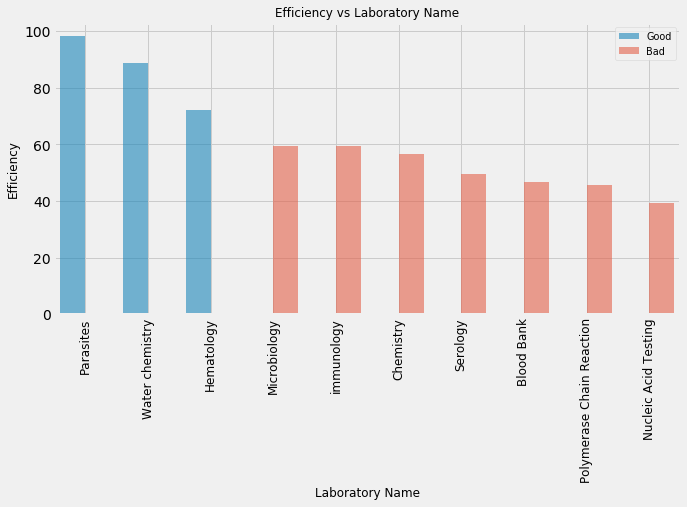

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))

X = lab_df_avg.index
Y = lab_df_avg.Efficiency

ax = sns.barplot(X, Y, data=lab_df_avg, hue='Quality', alpha=0.6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)

plt.title('Efficiency vs Laboratory Name', fontsize=12)
plt.xlabel('Laboratory Name', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)

plt.legend(loc=1, fontsize='x-small')
plt.grid(True)
plt.show()

In the Regional Laboratory, there are **70%** of laboratories assort as _Bad Efficiency_ and **30%** as _Good Efficiency_.
If _Efficiency_ less than **70%** the _Quality_ becomes __Bad otherwise Good__.

#### Blood Bank 

In [28]:
BB = lab_df[lab_df['LabName'] == 'Blood Bank'].sort_values(by='Quality', ascending=False, ignore_index=True)
BB

,LabName,Room,Floor,DevicesCount,TemperatureDegree,Efficiency,Quality
0,Blood Bank,1,GF,6,28.30,37.0,Bad
1,Blood Bank,2,GF,5,27.55,44.5,Bad
2,Blood Bank,3,GF,4,28.42,35.8,Bad
3,Blood Bank,4,GF,5,26.81,51.9,Bad
4,Blood Bank,5,GF,3,25.60,64.0,Bad


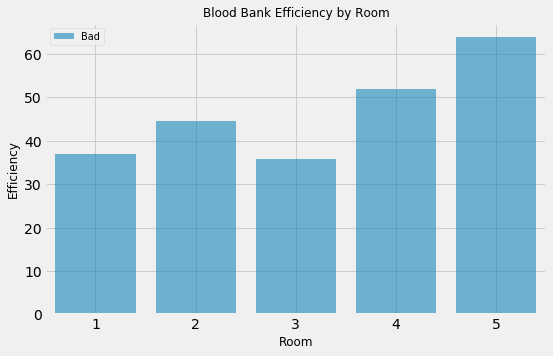

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))

X = BB['Room']
Y = BB['Efficiency']

sns.barplot(X, Y, hue=BB['Quality'], alpha=0.6)

plt.title('Blood Bank Efficiency by Room', fontsize=12)
plt.xlabel('Room', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)

plt.legend(loc=2,fontsize='x-small')
plt.grid(True)
plt.show()

In Blood Bank , All Rooms assort as Bad Efficiency.

#### Polymerase Chain Reaction Laboratory

In [30]:
PCR = lab_df[lab_df['LabName'] == 'Polymerase Chain Reaction']
PCR

,LabName,Room,Floor,DevicesCount,TemperatureDegree,Efficiency,Quality
6,Polymerase Chain Reaction,1,FF,4,28.24,37.6,Bad
7,Polymerase Chain Reaction,2,FF,7,29.15,28.5,Bad
8,Polymerase Chain Reaction,3,FF,5,28.29,37.1,Bad
9,Polymerase Chain Reaction,4,FF,5,27.65,43.5,Bad
10,Polymerase Chain Reaction,5,FF,3,24.35,76.5,Good
11,Polymerase Chain Reaction,6,FF,3,26.93,50.7,Bad


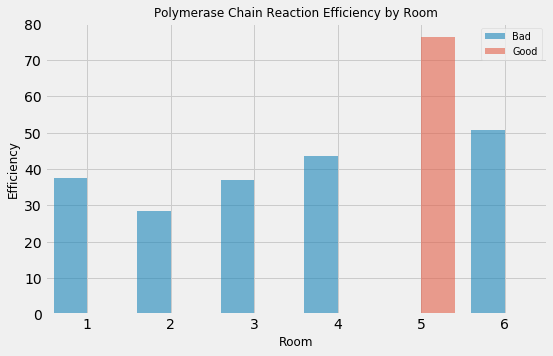

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))

PCR = lab_df[lab_df['LabName'] == 'Polymerase Chain Reaction']
X = PCR['Room']
Y = PCR['Efficiency']

ax = sns.barplot(X, Y, hue=PCR['Quality'], alpha=0.6,)

plt.title('Polymerase Chain Reaction Efficiency by Room', fontsize=12)
plt.xlabel('Room', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)

plt.legend(loc= 1, fontsize='x-small')
plt.grid(True)
plt.show()

In Ploymerase Chain Reaction Laboratory, there are five Rooms assort as Bad Efficiency and one as Good Efficiency.

#### The Relation between Efficiency 'Dependent Variable' and Temperature Degree 'Independent Variable'

In [32]:
# Encoding Quality Good value is 1 and Bad value is 0
quality_encoder = np.where(lab_df.Quality == 'Good', 1, 0)
quality_encoder = pd.Series(q)

# plotting Temperature Degreee, Efficiency and quality_encoder to find the correlation between them.
data = lab_df                                        
data['Quality'] = quality_encoder                    
cols = ['TemperatureDegree','Efficiency','Quality']  

sns.pairplot(lab_df[cols], height=2.5)  

plt.show()

NameError: name 'q' is not defined

The graph proves the relation between Temperature Degrees and Efficiency Rates is __inversely proportional__ as well as most higher Degrees and lower Rates are within Bad Quality __'Zero value'__ while they are less within Good Quality __'One value'__.

In [33]:
cm = lab_df[cols].corr()

sns.set(font_scale=1)

sns.heatmap(data=cm,
           cbar=True,
           annot=True,
           square=True,
           fmt = '0.2f',
           annot_kws={'size':15},
           xticklabels=cols,
           yticklabels=cols)

plt.show()


NameError: name 'cols' is not defined

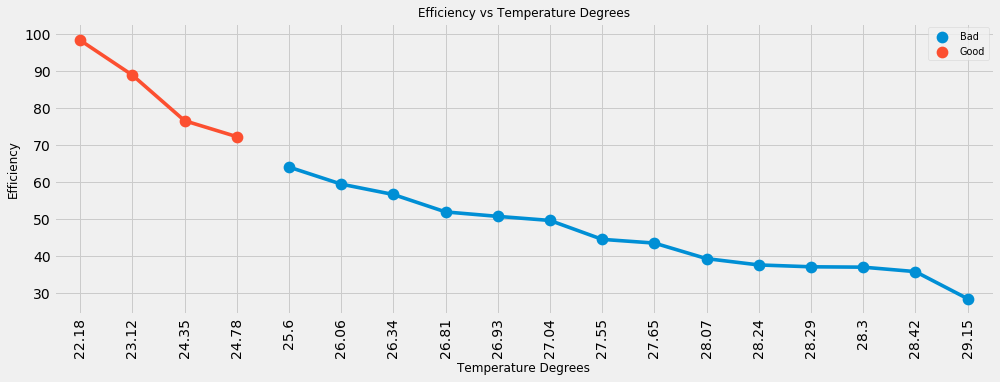

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))

X = lab_df['TemperatureDegree']
Y = lab_df['Efficiency']

ax = sns.pointplot(data=lab_df, x=X, y=Y, hue='Quality',scale=0.5,)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.title('Efficiency vs Temperature Degrees', fontsize=12)
plt.xlabel('Temperature Degrees', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)

plt.legend(loc= 1, fontsize='x-small')
plt.grid(True)
plt.show()

Overall, the _Efficiency Rates are decreased with increasing the Temperature Degrees_. When Degrees exceed **25 C**, the Rates  are within __Bad Rates__.

#### Temperature Degrees and Efficiency Distribution

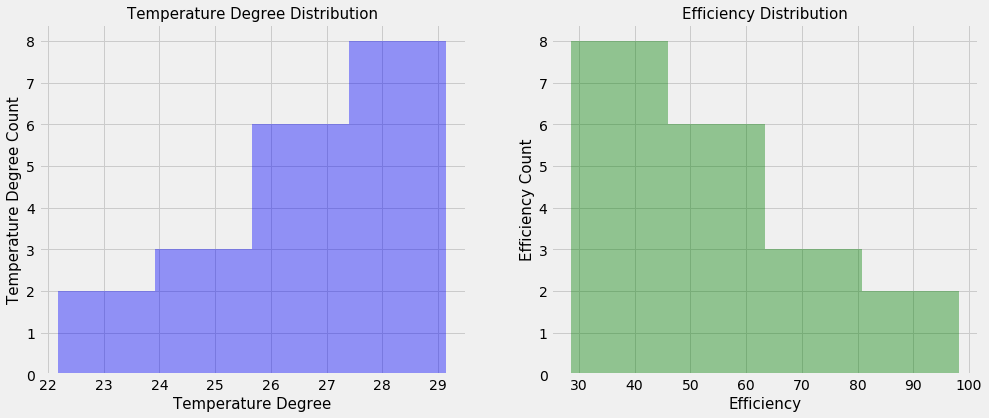

In [35]:
plt.style.use('fivethirtyeight')
f, axes = plt.subplots(ncols=2, figsize=(15,6))

X_0 = lab_df.TemperatureDegree
X_1 = lab_df.Efficiency
width = 0.18
sns.distplot(X_0, bins=4, kde=False, color='b', ax=axes[0]).set_title('Temperature Degree Distribution', fontsize=15)
axes[0].set_ylabel('Temperature Degree Count', fontsize=15)
axes[0].set_xlabel('Temperature Degree',fontsize=15)

sns.distplot(X_1 ,bins=4, kde=False, color='g', ax=axes[1]).set_title('Efficiency Distribution', fontsize=15)
axes[1].set_ylabel('Efficiency Count', fontsize=15)
axes[1].set_xlabel('Efficiency', fontsize=15)


plt.grid(True)
plt.show()

The _Blue Graph_ is represented as __Temperature Degree Distribution__ and the _Green Graph_ is represented as __Efficiency Distribution__. Each Temperature Degree is identified with a certain Efficiency Rate. The highest frequency Degrees are in range **27.35 to 29.15** with Efficiency in range **28.50 to 45.00** and the lowest frequency Efficiency in range **22. to 23.95** with Efficiency in range **81.00 to 98.20**.

#### What is the Quality Rate of Degrees?

In [36]:
quality_percent = lab_df['Quality'].value_counts(normalize=True)
quality_percent

Bad     0.789474
Good    0.210526
Name: Quality, dtype: float64

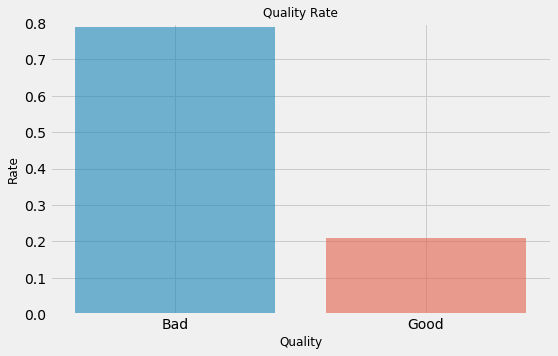

In [37]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,5))
plt.axis([0,2,0,0.8])

X = quality_percent.index
Y = quality_percent
sns.barplot(X, Y, alpha=0.6)

plt.title('Quality Rate', fontsize=12)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Rate', fontsize=12)

plt.grid(True)
plt.show()

There are 79% of Laboratories assort as Bad Quality and 21% as Good Quality.

#### Laboratoies Destribution by Floor

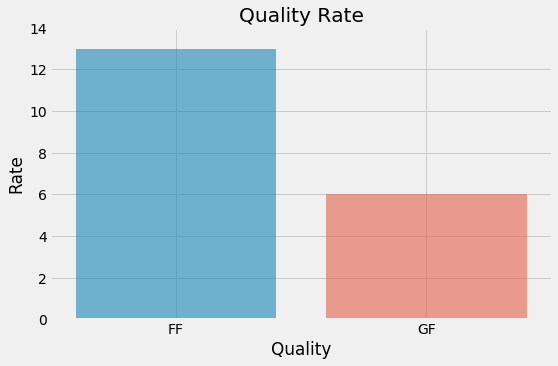

In [38]:
lab_df_floor = lab_df['Floor'].value_counts()
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,5))
plt.axis([0,2,0,14])

X = lab_df_floor.index
Y = lab_df_floor

sns.barplot(X, Y , alpha=0.6)

plt.title('Quality Rate')
plt.xlabel('Quality')
plt.ylabel('Rate')

plt.grid(True)
plt.show()

There are 13 laboratories located in First Floor and 6 laboratories in Ground Floor.

### Conclusion

There is an **inversely relational** between Efficiency rates and Temperature Degrees. Good Efficiency Rates when Temperature Degrees are less than or equal **25 C**. There are **13** laboratories have bad Efficiency Rates and **6** Laboratories have good Efficiency Rates. **68%** of laboratories are located on First Floor and **32%** in Ground Floor. The Temperature Degrees average is about **26.42 C** with Efficiency Rate of **54.24%**, this refers to a Bad Rate.

In [ ]:
pd.DataFrame.to_csv(lab_df,'My_Own_Project.csv')